## Part 1 - Read, Clean, Create Sets

This project will use the Online Food dataset. Dataset was found on Kaggle.

In [2]:
import pandas as pd

df = pd.read_csv('onlinefoods.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
df.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
Unnamed: 12                    object
dtype: object

In [4]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [7]:
df.shape

(388, 13)

In [8]:
# remove duplicate unnamed 13th column from dataframe
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [9]:
df.shape

(388, 12)

In [11]:
# create new df for cleaning before splitting
df1 = df.copy()
df1.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [13]:
# split df into inputs and target
inputs = df1.drop(['Age','Gender', 'latitude', 'longitude', 'Pin code', 'Output', 'Feedback'], axis='columns')
target = df1['Gender']
inputs

,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size
0,Single,Student,No Income,Post Graduate,4
1,Single,Student,Below Rs.10000,Graduate,3
2,Single,Student,Below Rs.10000,Post Graduate,3
3,Single,Student,No Income,Graduate,6
4,Single,Student,Below Rs.10000,Post Graduate,4
...,...,...,...,...,...
383,Single,Student,No Income,Post Graduate,2
384,Single,Student,No Income,Post Graduate,4
385,Single,Student,No Income,Post Graduate,5
386,Single,Student,Below Rs.10000,Post Graduate,2


In [14]:
target

0      Female
1      Female
2        Male
3      Female
4        Male
        ...  
383    Female
384    Female
385    Female
386      Male
387      Male
Name: Gender, Length: 388, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

# predict gender based off inputs
# using LabelEncoder to map each column for better classification
le_gender = LabelEncoder()
le_marital = LabelEncoder()
le_occupation = LabelEncoder()
le_income = LabelEncoder()
le_education = LabelEncoder()
le_family = LabelEncoder()


In [26]:
inputs['marital-status'] = le_marital.fit_transform(inputs['Marital Status'])
inputs['occupation'] = le_marital.fit_transform(inputs['Occupation'])
inputs['monthly-income'] = le_marital.fit_transform(inputs['Monthly Income'])
inputs['education'] = le_marital.fit_transform(inputs['Educational Qualifications'])
inputs['family-size'] = le_marital.fit_transform(inputs['Family size'])
target = target.to_frame() # convert series to dataframe for target conversion
target['gender'] = le_gender.fit_transform(target['Gender'])

In [30]:
# double check inputs and target after LabelEncoder
target.head()

,Gender,gender
0,Female,0
1,Female,0
2,Male,1
3,Female,0
4,Male,1


In [46]:
inputs.head()

,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,marital-status,occupation,monthly-income,education,family-size
0,Single,Student,No Income,Post Graduate,4,2,3,4,2,3
1,Single,Student,Below Rs.10000,Graduate,3,2,3,2,0,2
2,Single,Student,Below Rs.10000,Post Graduate,3,2,3,2,2,2
3,Single,Student,No Income,Graduate,6,2,3,4,0,5
4,Single,Student,Below Rs.10000,Post Graduate,4,2,3,2,2,3


In [39]:
# create new df and drop non encoded columns
inputs_new = inputs.drop(['Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Family size'], axis='columns')
inputs_new.head()


,marital-status,occupation,monthly-income,education,family-size
0,2,3,4,2,3
1,2,3,2,0,2
2,2,3,2,2,2
3,2,3,4,0,5
4,2,3,2,2,3


In [40]:
target_new = target.drop('Gender', axis='columns')
target_new.head()

,gender
0,0
1,0
2,1
3,0
4,1


## Part 2 - Build Model and Evaluate

In [41]:
from sklearn import tree

In [42]:
model = tree.DecisionTreeClassifier()

In [43]:
model.fit(inputs_new, target_new)

DecisionTreeClassifier()

In [44]:
model.score(inputs_new, target_new)

0.7757731958762887

In [45]:
model.predict([[2,3,2,0,2]])

C:\Users\S537849\wmvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

With the provided inputs, decision tree is accurate only 77% of time predicting gender, which is shown in prediction above as with the inputs provided should be Male however the model inaccurately predicted Female.Going to see if this score will improve when mulitiple decision trees are brought together:

## Random Forest Classifier

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_new, target_new, test_size=0.20, random_state=123)

In [51]:
print('X train:', len(x_train))
print('X test:', len(x_test))
print('Y train:', len(y_train))
print('Y test:', len(y_test))

X train: 310
X test: 78
Y train: 310
Y test: 78


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model1 = RandomForestClassifier(n_estimators=15)
model1.fit(x_train, y_train)

C:\Users\S537849\wmvenv\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=15)

In [66]:
model1.score(x_test, y_test)

0.6153846153846154

Based off the results, it is clear that random forest did not improve over decision tree, in fact random forest underperformed against decision tree.

In [67]:
y_predicted = model1.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[14, 22],
       [ 8, 34]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

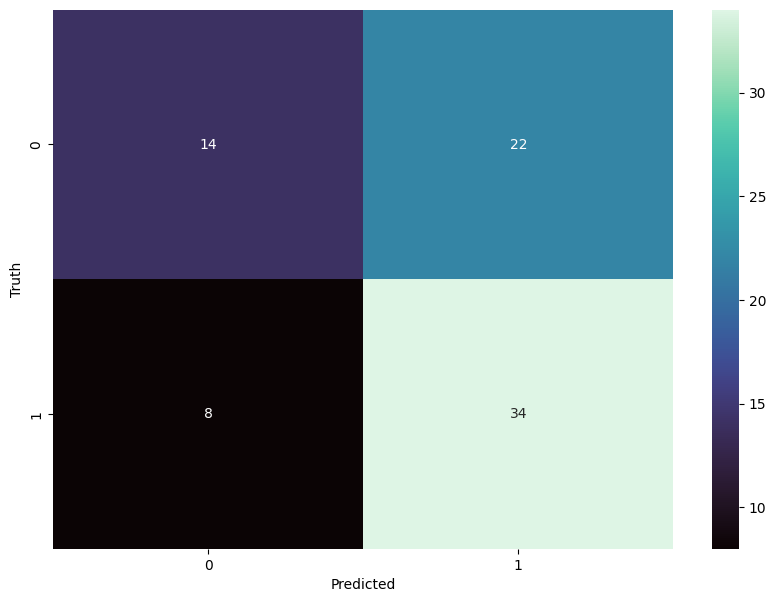

In [70]:
# visualize confusion matrix
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap='mako')
plt.xlabel('Predicted')
plt.ylabel('Truth')